# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [3]:
df = pd.read_csv ('/kaggle/input/smoking-drinking-dataset/smoking_driking_dataset_Ver01.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [5]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,Male,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,N
991342,Male,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,N
991343,Female,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,Y
991344,Male,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,N


In [6]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [7]:
for col in df.columns:
    print(f"Distribusi setiap value pada kolom '{col}':")
    print(df[col].value_counts())
    print ("-" * 50)

Distribusi setiap value pada kolom 'sex':
sex
Male      526415
Female    464931
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'age':
age
40    130385
50    129434
45    118355
55    111223
60    106063
35     84726
30     77600
25     64370
65     52961
70     50666
75     25333
20     21971
80     14968
85      3291
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'height':
height
160    181809
165    178228
170    166328
155    165678
150    107929
175     98850
145     39176
180     35970
140      9100
185      6588
135      1241
190       363
130        86
Name: count, dtype: int64
--------------------------------------------------
Distribusi setiap value pada kolom 'weight':
weight
60     151134
55     150415
65     141241
50     125079
70     122281
75      90207
45      63047
80      58176
85      33708
90      18250
40      16639
95       9655
100    

In [8]:
print(df.duplicated().sum())
df = df.drop_duplicates()

26


DRK_YN
N    495844
Y    495476
Name: count, dtype: int64


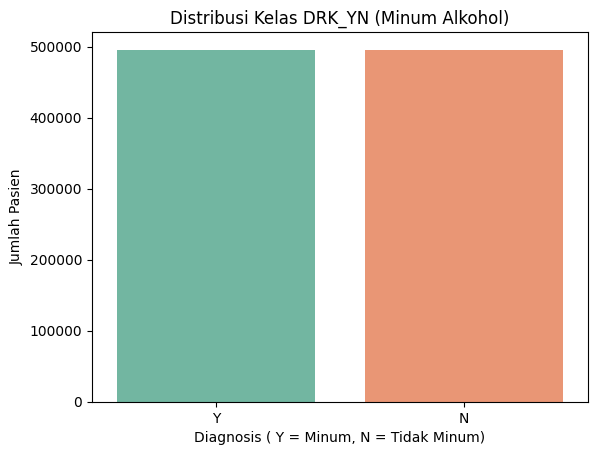

In [9]:
print(df['DRK_YN'].value_counts())

sns.countplot(x='DRK_YN', data=df, palette='Set2')
plt.title('Distribusi Kelas DRK_YN (Minum Alkohol)')
plt.xlabel('Diagnosis ( Y = Minum, N = Tidak Minum)')
plt.ylabel('Jumlah Pasien')
plt.show()

In [10]:
kolom_numerik = [
    'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS',
    'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

kategorikal = ['sex', 'hear_left','hear_right', 'SMK_stat_type_cd','urine_protein']

cek outlier metode *IQR*

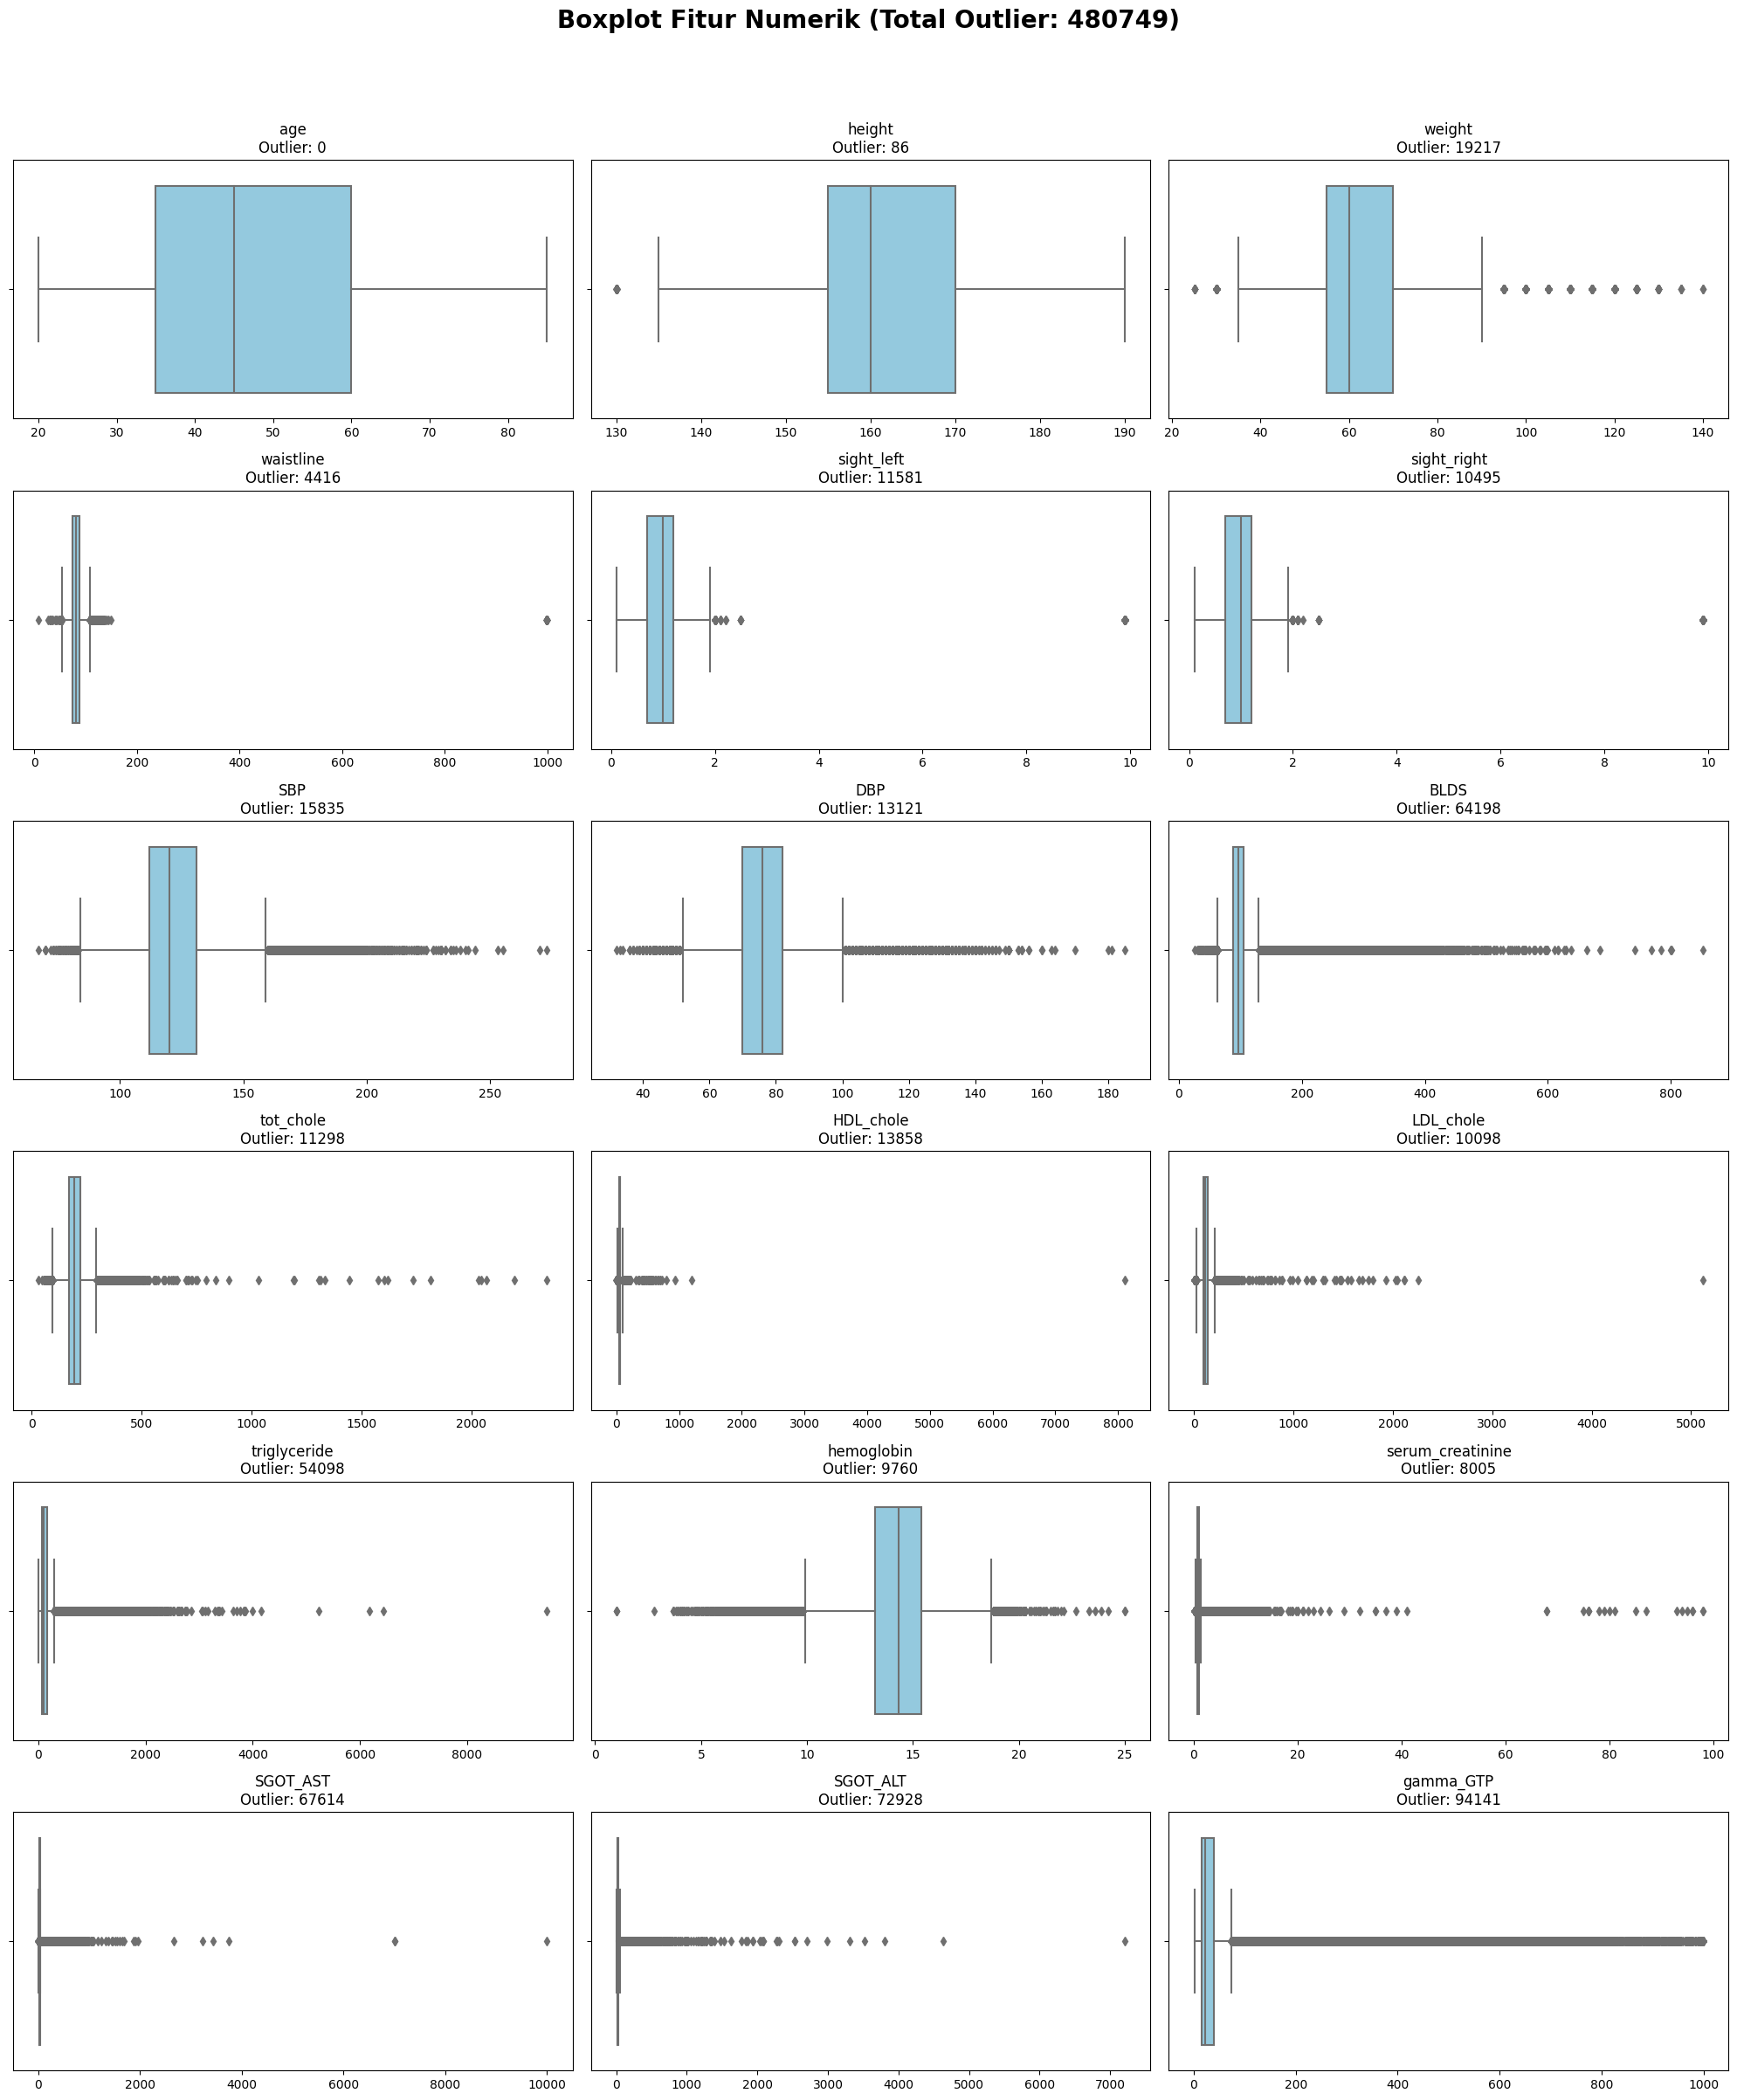

In [11]:
def detect_outliers_iqr(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return df[(df[col] < low) | (df[col] > high)]

outlier_info = {}
total = 0
for col in kolom_numerik:
    n = len(detect_outliers_iqr(df, col))
    outlier_info[col] = n
    total += n

plt.figure(figsize=(20, 24))
for i, col in enumerate(kolom_numerik):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"{col}\nOutlier: {outlier_info[col]}", fontsize=12)
    plt.xlabel("")

plt.suptitle(f"Boxplot Fitur Numerik (Total Outlier: {total})", fontsize=20, fontweight='bold', y=1)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Processing

In [12]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le = LabelEncoder()
for col in kategorikal:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [13]:
df_encoded['DRK_YN'] = df_encoded['DRK_YN'].map({'N': 0, 'Y': 1}).astype(int)

In [14]:
print(df_encoded['DRK_YN'].unique())

[1 0]


In [15]:
X = df_encoded.drop('DRK_YN', axis=1)
y = df_encoded['DRK_YN']

## Seleksi Fitur

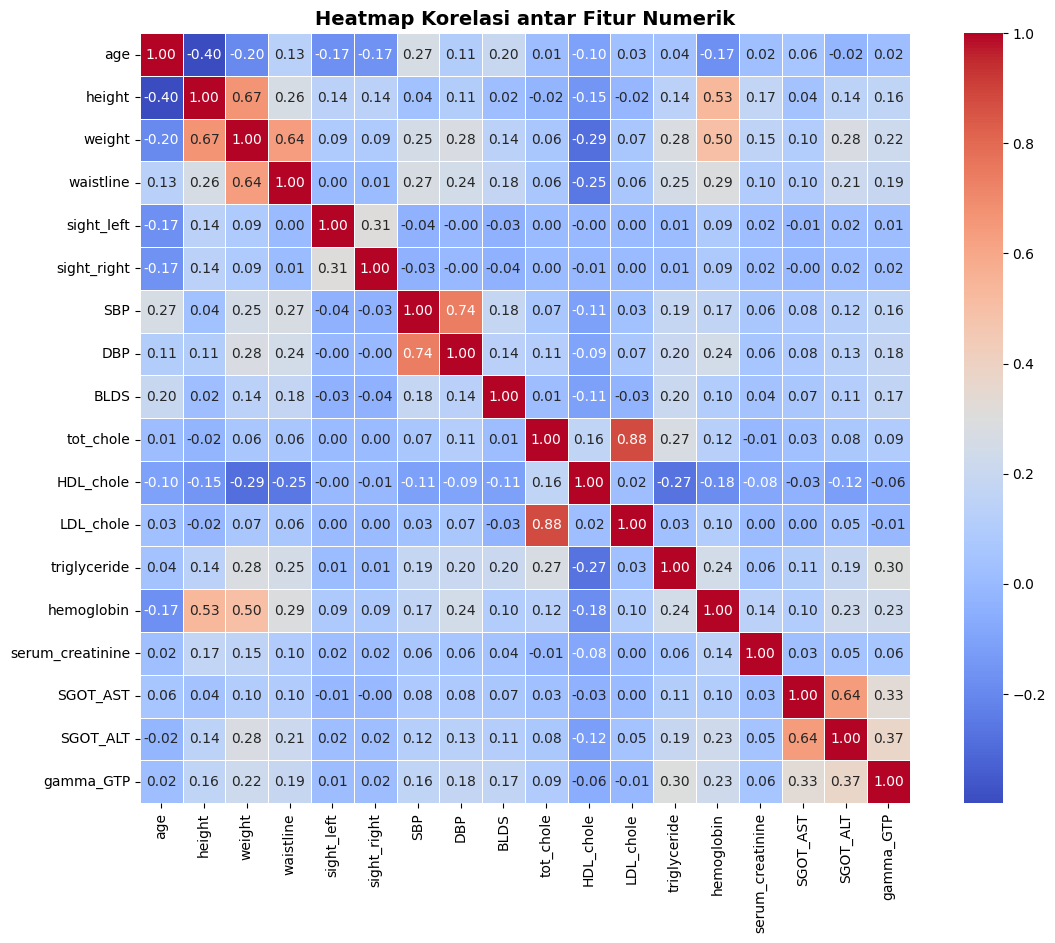

In [16]:
df_numerik = df_encoded[kolom_numerik]

corr_matrix = df_numerik.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Heatmap Korelasi antar Fitur Numerik", fontsize=14, weight='bold')
plt.show()

In [17]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = upper.stack().reset_index()
high_corr.columns = ['Fitur 1', 'Fitur 2', 'Korelasi']
high_corr = high_corr[high_corr['Korelasi'].abs() > 0.7].sort_values(by='Korelasi', ascending=False)

print("Pasangan fitur numerik dengan korelasi tinggi (> 0.7):")
display(high_corr)

Pasangan fitur numerik dengan korelasi tinggi (> 0.7):


,Fitur 1,Fitur 2,Korelasi
118,tot_chole,LDL_chole,0.877367
87,SBP,DBP,0.741126


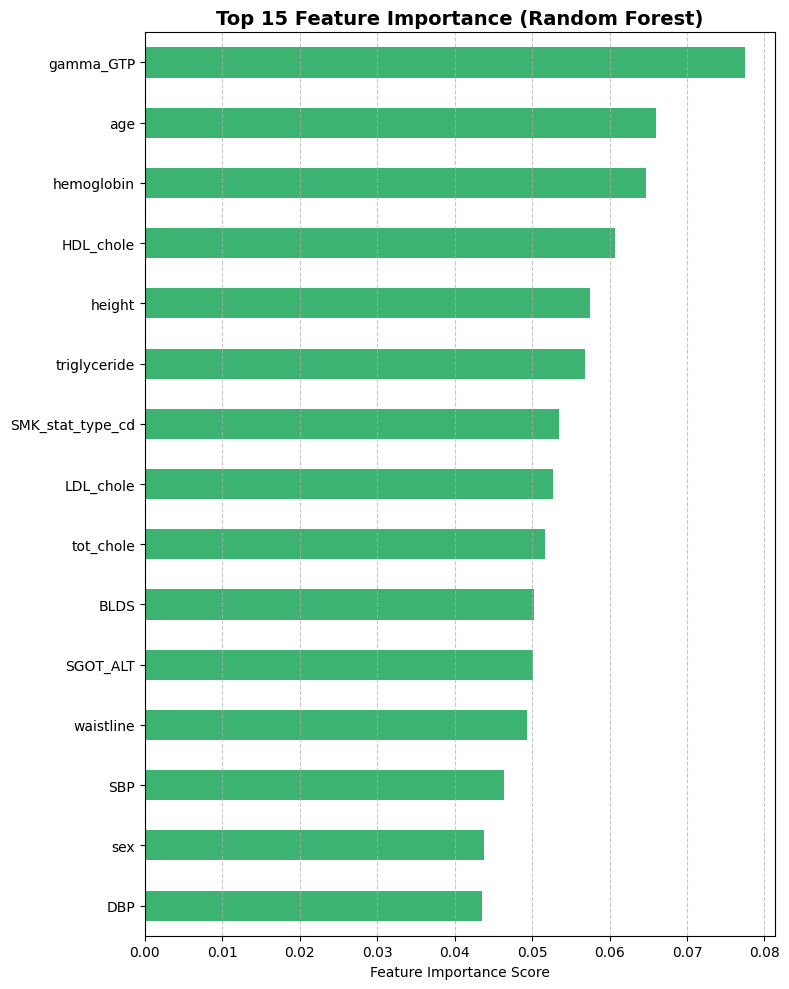

Top 15 features:
['gamma_GTP', 'age', 'hemoglobin', 'HDL_chole', 'height', 'triglyceride', 'SMK_stat_type_cd', 'LDL_chole', 'tot_chole', 'BLDS', 'SGOT_ALT', 'waistline', 'SBP', 'sex', 'DBP']


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(8, 10))
importances_sorted.head(15).plot(kind='barh', color='mediumseagreen')
plt.title("Top 15 Feature Importance (Random Forest)", fontsize=14, fontweight='bold')
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

top15_features = importances_sorted.head(15).index.tolist()

print("Top 15 features:")
print(top15_features)

In [19]:
print(type(y))
print(y.dtype)
print(y.unique())

<class 'pandas.core.series.Series'>
int64
[1 0]


In [20]:
X_top15 = X[top15_features]

In [21]:
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X_top15, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.125,
    random_state=42,
    stratify=y_temp
)

print("Train :", X_train.shape)
print("Val   :", X_val.shape)
print("Test  :", X_test.shape)


Train : (693924, 15)
Val   : (99132, 15)
Test  : (198264, 15)


In [22]:
from sklearn.preprocessing import MinMaxScaler

numerik = ['age', 'gamma_GTP', 'hemoglobin', 'HDL_chole', 'triglyceride',
    'LDL_chole', 'tot_chole', 'height', 'waistline', 'BLDS',
    'SBP', 'SGOT_ALT', 'DBP']

scaler = MinMaxScaler()

X_train[numerik] = scaler.fit_transform(X_train[numerik])
X_test[numerik] = scaler.transform(X_test[numerik])

In [23]:
X_train.head(20)

,gamma_GTP,age,hemoglobin,HDL_chole,height,triglyceride,SMK_stat_type_cd,LDL_chole,tot_chole,BLDS,SGOT_ALT,waistline,SBP,sex,DBP
565920,0.013026,0.076923,0.504167,0.007399,0.333333,0.006534,0,0.024424,0.073466,0.077419,0.001942,0.061554,0.197044,0,0.244898
616392,0.013026,0.076923,0.520833,0.006043,0.583333,0.006850,0,0.019930,0.059205,0.067097,0.000694,0.054490,0.177340,0,0.156463
294123,0.030060,0.461538,0.612500,0.004193,0.666667,0.030035,1,0.019539,0.070873,0.087742,0.004023,0.084561,0.251232,1,0.299320
659006,0.017034,0.461538,0.420833,0.008509,0.416667,0.009274,0,0.020516,0.070873,0.080000,0.002774,0.057013,0.113300,0,0.156463
240093,0.013026,0.846154,0.525000,0.004440,0.333333,0.014227,0,0.018953,0.057476,0.116129,0.002636,0.098890,0.310345,0,0.299320
62632,0.009018,0.153846,0.479167,0.008139,0.416667,0.005796,0,0.015240,0.054883,0.089032,0.001387,0.060747,0.128079,0,0.122449
662507,0.067134,0.461538,0.645833,0.005179,0.583333,0.017178,2,0.031458,0.089888,0.090323,0.005410,0.075681,0.305419,1,0.251701
135999,0.019038,0.307692,0.587500,0.006536,0.583333,0.010749,1,0.026964,0.079516,0.091613,0.003468,0.077699,0.413793,1,0.414966
836383,0.019038,0.769231,0.612500,0.007892,0.333333,0.015913,0,0.031067,0.097666,0.118710,0.003329,0.078103,0.344828,0,0.380952
232221,0.046092,0.615385,0.529167,0.005796,0.583333,0.005902,1,0.024424,0.067416,0.134194,0.001665,0.090817,0.236453,1,0.299320


In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [25]:
# Sebelum SMOTE
print("Distribusi label sebelum SMOTE:")
print(y_train.value_counts())

# Sesudah SMOTE
print("\nDistribusi label sesudah SMOTE:")
print(y_train_bal.value_counts())

Distribusi label sebelum SMOTE:
DRK_YN
0    347091
1    346833
Name: count, dtype: int64

Distribusi label sesudah SMOTE:
DRK_YN
1    347091
0    347091
Name: count, dtype: int64


# Model

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Latih model di data train
model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

# Prediksi di test
y_test_pred = model.predict(X_test)
print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test, y_test_pred))

=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.73      0.73      0.73     99169
           1       0.73      0.73      0.73     99095

    accuracy                           0.73    198264
   macro avg       0.73      0.73      0.73    198264
weighted avg       0.73      0.73      0.73    198264



## Tabnet

In [27]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [28]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier

X_train_np = X_train_bal.values.astype('float32')
X_val_np = X_val.values.astype('float32')
X_test_np = X_test.values.astype('float32')

y_train_np = y_train_bal.values.astype('int64')
y_val_np = y_val.values.astype('int64')
y_test_np = y_test.values.astype('int64')

# Optimized TabNet
tabnet_model = TabNetClassifier(
    n_d=32,
    n_a=32,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size": 10, "gamma": 0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax',
    seed=42
)

# Train model
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_name=['val'],
    eval_metric=['accuracy', 'balanced_accuracy', 'auc'],
    max_epochs=50,
    patience=20,
    batch_size=512,
    virtual_batch_size=64
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.54627 | val_accuracy: 0.51073 | val_balanced_accuracy: 0.51057 | val_auc: 0.51243 |  0:01:23s
epoch 1  | loss: 0.5276  | val_accuracy: 0.49787 | val_balanced_accuracy: 0.49769 | val_auc: 0.49643 |  0:02:45s
epoch 2  | loss: 0.52877 | val_accuracy: 0.36949 | val_balanced_accuracy: 0.36941 | val_auc: 0.37038 |  0:04:07s
epoch 3  | loss: 0.52537 | val_accuracy: 0.58574 | val_balanced_accuracy: 0.58566 | val_auc: 0.6152  |  0:05:28s
epoch 4  | loss: 0.52571 | val_accuracy: 0.52299 | val_balanced_accuracy: 0.52293 | val_auc: 0.52383 |  0:06:50s
epoch 5  | loss: 0.52495 | val_accuracy: 0.5505  | val_balanced_accuracy: 0.55042 | val_auc: 0.55046 |  0:08:12s
epoch 6  | loss: 0.52379 | val_accuracy: 0.50461 | val_balanced_accuracy: 0.50444 | val_auc: 0.50062 |  0:09:33s
epoch 7  | loss: 0.52594 | val_accuracy: 0.50223 | val_balanced_accuracy: 0.50205 | val_auc: 0.50461 |  0:10:56s
epoch 8  | loss: 0.52323 | val_accuracy: 0.61627 | val_balanced_accuracy: 0.6162  | val_auc: 0.6

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


=== Evaluasi pada Test Set ===
              precision    recall  f1-score   support

           0       0.75      0.70      0.73     99169
           1       0.72      0.77      0.74     99095

    accuracy                           0.74    198264
   macro avg       0.74      0.74      0.74    198264
weighted avg       0.74      0.74      0.74    198264



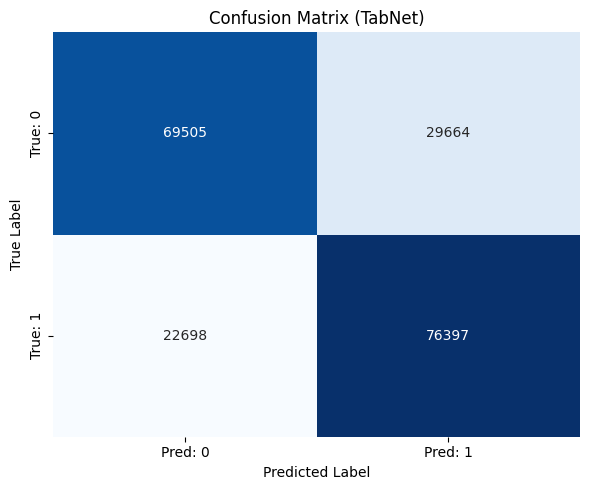

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_pred = tabnet_model.predict(X_test_np)

print("=== Evaluasi pada Test Set ===")
print(classification_report(y_test_np, y_test_pred))

cm = confusion_matrix(y_test_np, y_test_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred: 0', 'Pred: 1'],
            yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix (TabNet)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

## D1 CNN

In [30]:
X_train_bal = X_train_bal.to_numpy().astype('float32')
X_val       = X_val.to_numpy().astype('float32')
X_test      = X_test.to_numpy().astype('float32')

y_train_bal = y_train_bal.to_numpy().astype('float32')
y_val       = y_val.to_numpy().astype('float32')
y_test      = y_test.to_numpy().astype('float32')

In [31]:
X_train_cnn = X_train_bal.reshape(X_train_bal.shape[0], X_train_bal.shape[1], 1)
X_val_cnn   = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("X_train_cnn:", X_train_cnn.shape)
print("X_val_cnn:", X_val_cnn.shape)
print("X_test_cnn:", X_test_cnn.shape)

X_train_cnn: (694182, 15, 1)
X_val_cnn: (99132, 15, 1)
X_test_cnn: (198264, 15, 1)


In [32]:
pip install tensorflow==2.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.2
    Uninstalling google-auth-oauthlib-1.2.2:
      Successfully uninstalled google-auth-oauthlib-1.2.2
  Attempting uninstall:

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train_cnn.shape[1], 1)),

    Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

2025-07-28 07:04:28.557339: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-07-28 07:04:28.557407: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-07-28 07:04:28.557450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_ckpt = ModelCheckpoint(filepath='best_cnn_model_drinking.h5', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = model.fit(
    X_train_cnn, y_train_bal,
    validation_data=(X_val_cnn, y_val),
    epochs=25,
    batch_size=256,
    callbacks=[early_stop, model_ckpt, reduce_lr],
    verbose=1
)

Epoch 1/25
2710/2712 [============================>.] - ETA: 0s - loss: 0.5783 - accuracy: 0.7023
Epoch 1: val_loss improved from inf to 70.20146, saving model to best_cnn_model_drinking.h5
2712/2712 [==============================] - 66s 23ms/step - loss: 0.5783 - accuracy: 0.7023 - val_loss: 70.2015 - val_accuracy: 0.5569 - lr: 1.0000e-04
Epoch 2/25
   4/2712 [..............................] - ETA: 59s - loss: 0.5404 - accuracy: 0.7295 

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2711/2712 [============================>.] - ETA: 0s - loss: 0.5621 - accuracy: 0.7102
Epoch 2: val_loss did not improve from 70.20146
2712/2712 [==============================] - 62s 23ms/step - loss: 0.5621 - accuracy: 0.7101 - val_loss: 75.0736 - val_accuracy: 0.5577 - lr: 1.0000e-04
Epoch 3/25
2712/2712 [==============================] - ETA: 0s - loss: 0.5561 - accuracy: 0.7138
Epoch 3: val_loss did not improve from 70.20146
2712/2712 [==============================] - 62s 23ms/step - loss: 0.5561 - accuracy: 0.7138 - val_loss: 83.5073 - val_accuracy: 0.5531 - lr: 1.0000e-04
Epoch 4/25
2711/2712 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7162
Epoch 4: val_loss improved from 70.20146 to 37.08114, saving model to best_cnn_model_drinking.h5
2712/2712 [==============================] - 62s 23ms/step - loss: 0.5527 - accuracy: 0.7162 - val_loss: 37.0811 - val_accuracy: 0.6384 - lr: 1.0000e-04
Epoch 5/25
2710/2712 [============================>.] - ETA: 0s -

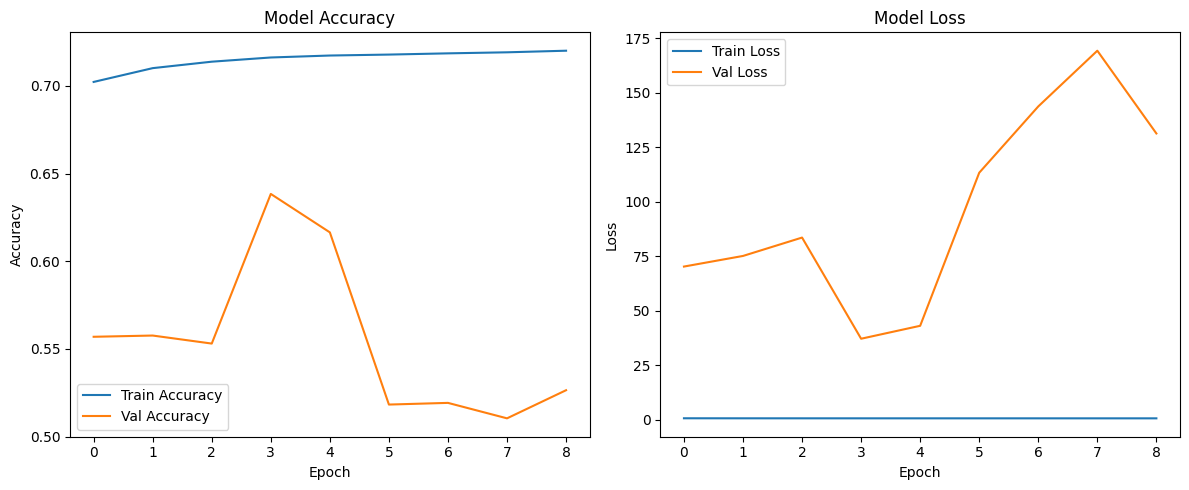

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

6196/6196 [==============================] - 12s 2ms/step


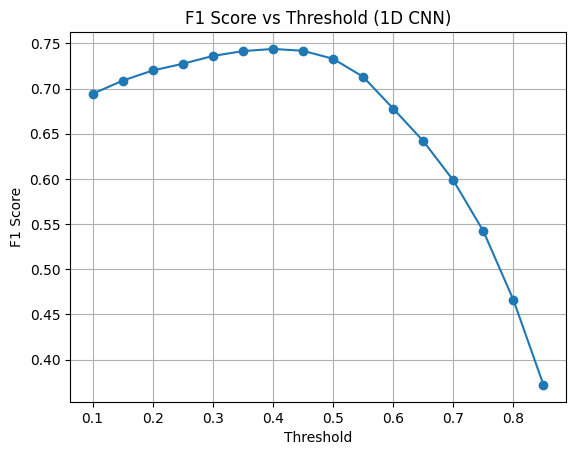

Best threshold: 0.40 (F1 score: 0.7438)

Classification Report with Tuned Threshold:
              precision    recall  f1-score   support

          No       0.80      0.54      0.65     99169
         Yes       0.65      0.86      0.74     99095

    accuracy                           0.70    198264
   macro avg       0.73      0.70      0.69    198264
weighted avg       0.73      0.70      0.69    198264



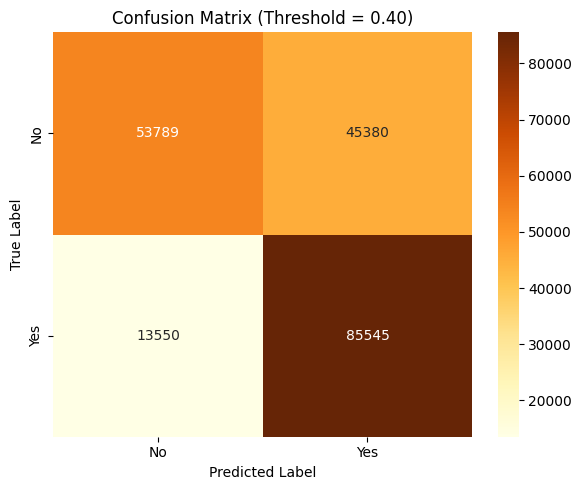

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

y_pred_prob = model.predict(X_test_cnn)

# threshold
thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for t in thresholds:
    y_pred = (y_pred_prob > t).astype(int)
    score = f1_score(y_test, y_pred)
    f1_scores.append(score)

plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold (1D CNN)")
plt.grid()
plt.show()

# Ambil threshold terbaik
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold: {best_threshold:.2f} (F1 score: {max(f1_scores):.4f})")

y_pred_final = (y_pred_prob > best_threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_final)
labels = ['No', 'Yes']

print("\nClassification Report with Tuned Threshold:")
print(classification_report(y_test, y_pred_final, target_names=labels))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (Threshold = {best_threshold:.2f})')
plt.tight_layout()
plt.show()

# Analisis Hasil

## 🧪 Evaluation Results (on Test Set)

| Model         | Precision (No) | Recall (No) | F1-Score (No) | Precision (Yes) | Recall (Yes) | F1-Score (Yes) | Accuracy |
|---------------|----------------|--------------|----------------|------------------|---------------|----------------|----------|
| **Random Forest** | 0.73           | 0.73         | 0.73           | 0.73             | 0.73          | 0.73           | 0.73     |
| **TabNet**        | 0.75           | 0.70         | 0.73           | 0.72             | 0.77          | **0.74**       | **0.74** |
| **1D CNN (Tuned Threshold)** | **0.80**       | **0.52**     | 0.63           | 0.65             | **0.87**      | **0.74**       | 0.70     |
## 📈 Insight & Analysis

- **TabNet dan 1D CNN (tuned)** sama-sama unggul dalam F1-Score untuk kelas "Yes".
- CNN lebih unggul dalam mendeteksi peminum (recall = 0.87).
- TabNet menunjukkan akurasi keseluruhan tertinggi (0.74).
- Random Forest menjadi baseline dengan performa stabil namun tidak unggul.